In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib
import time
import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9
%matplotlib inline
import seaborn as sns

In [2]:
df_raw = xr.open_dataset("NC/bowen_ratio_5_95_mean_2d.nc")

In [3]:
df_raw

<xarray.Dataset>
Dimensions:      (lat: 360, lon: 720, pft: 17, time: 1)
Coordinates:
  * time         (time) int64 0
  * pft          (pft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * lat          (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float32 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
Data variables:
    FSH          (time, pft, lat, lon) float64 ...
    EFLX_LH_TOT  (time, pft, lat, lon) float64 ...
    BOWEN_RATIO  (time, pft, lat, lon) float64 ...

In [4]:
b_95 = df_raw['BOWEN_RATIO'].quantile(q = 0.95)
b_05 = df_raw['BOWEN_RATIO'].quantile(q = 0.05)
s_95 = df_raw['FSH'].quantile(q = 0.95)
s_05 = df_raw['FSH'].quantile(q = 0.05)
l_95 = df_raw['EFLX_LH_TOT'].quantile(q = 0.95)
l_05 = df_raw['EFLX_LH_TOT'].quantile(q = 0.05)


df=df_raw.where((df_raw['BOWEN_RATIO']<b_95) & (df_raw['BOWEN_RATIO']>b_05) ) #处理Bowen ratio异常值
df=df.where((df['FSH']<s_95) & (df['FSH']>s_05) )#在上一步基础上处理感热异常值
df=df.where((df['EFLX_LH_TOT']<l_95) & (df['EFLX_LH_TOT']>l_05) )#在上一步基础上处理潜热异常值


In [5]:
df

<xarray.Dataset>
Dimensions:      (lat: 360, lon: 720, pft: 17, time: 1)
Coordinates:
  * time         (time) int64 0
  * pft          (pft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * lat          (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float32 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
Data variables:
    FSH          (time, pft, lat, lon) float64 nan nan nan nan ... nan nan nan
    EFLX_LH_TOT  (time, pft, lat, lon) float64 nan nan nan nan ... nan nan nan
    BOWEN_RATIO  (time, pft, lat, lon) float64 nan nan nan nan ... nan nan nan

In [6]:
data= pd.read_csv("folder/各点多年平均_有经纬LAI.csv")

In [7]:
#模型中WET和DNF是空值，故不对这两种类型作对比
data=data[ ~data['IGBP'].str.contains('WET')]
data=data[ ~data['IGBP'].str.contains('DNF')]
data.reset_index(drop=True,inplace=True)

In [8]:
#pft和IGBP植被类型转化
lis=[]
for i in range(183):
    if (data.loc[[i],['IGBP']]=='ENF').bool():
        lis.append([1,2])
    elif (data.loc[[i],['IGBP']]=='EBF').bool():
        lis.append([4,5])
    elif (data.loc[[i],['IGBP']]=='DBF').bool():
        lis.append([6,7,8])
    elif (data.loc[[i],['IGBP']]=='MF').bool():
        lis.append([1,2,3,4,5,6,7,8])
    elif (data.loc[[i],['IGBP']]=='CSH').bool():
        lis.append([9,10,11])
    elif (data.loc[[i],['IGBP']]=='OSH').bool():
        lis.append([9,10,11])
    elif (data.loc[[i],['IGBP']]=='WSA').bool():
        lis.append([1,2,3,4,5,6,7,8,9,10,11])
    elif (data.loc[[i],['IGBP']]=='SAV').bool():
        lis.append([1,2,3,4,5,6,7,8,9,10,11])
    elif (data.loc[[i],['IGBP']]=='GRA').bool():
        lis.append([12,13,14])
    elif (data.loc[[i],['IGBP']]=='CRO').bool():
        lis.append([15])
        

In [9]:
lis

[[1, 2, 3, 4, 5, 6, 7, 8],
 [1, 2],
 [12, 13, 14],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [4, 5],
 [12, 13, 14],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [12, 13, 14],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [6, 7, 8],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [12, 13, 14],
 [4, 5],
 [12, 13, 14],
 [12, 13, 14],
 [4, 5],
 [4, 5],
 [4, 5],
 [4, 5],
 [12, 13, 14],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [15],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [4, 5],
 [4, 5],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [1, 2],
 [1, 2],
 [6, 7, 8],
 [1, 2],
 [1, 2],
 [1, 2],
 [1, 2],
 [9, 10, 11],
 [1, 2],
 [1, 2],
 [1, 2],
 [1, 2],
 [6, 7, 8],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [12, 13, 14],
 [1, 2],
 [12, 13, 14],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [12, 13, 14],
 [15],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [12, 13, 14],
 [12, 13, 14],
 [4, 5],
 [12, 13, 14],
 [12, 13, 

In [10]:
lat=data.latitude
lon=data.longitude_new

data['H_M'] = None
data['LE_M'] = None
data['b_M'] = None

for i in range(183):
    df1=df.sel(lat=lat[i],lon=lon[i],pft=lis[i],method='nearest').mean()
    FSH = df1.variables['FSH']
    data.loc[i,'H_M']=float(FSH)

    
    EFLX_LH_TOT = df1.variables['EFLX_LH_TOT']
    data.loc[i,'LE_M']=float(EFLX_LH_TOT)
    
    
    BOWEN_RATIO = df1.variables['BOWEN_RATIO']
    data.loc[i,'b_M']=float(BOWEN_RATIO)
    

In [11]:
data

,Unnamed: 0,H_F_MDS,type,name,valid,LE_F_MDS,P_F,TA_F,SW_OUT,P_SUM,...,albedo,b,latitude,longitude,longitude_new,IGBP,LAI,H_M,LE_M,b_M
0,0,68.095032,MF_S,AR-SLu,0.801865,39.510745,0.020445,19.572791,NaN,23.146222,...,NaN,2.084899,-33.464800,-66.459800,293.540200,MF,0.640604,104.869476,88.217136,1.312262
1,0,-18.943289,ENF_S,AR-Vir,0.808693,82.198975,0.082782,21.431613,NaN,97.251417,...,NaN,-0.235940,-28.239500,-56.188600,303.811400,ENF,2.414140,NaN,NaN,NaN
2,0,-3.286018,GRA,AT-Neu,0.809954,16.211796,0.042371,5.827517,56.022692,49.006782,...,0.364724,-1.561054,47.116670,11.317500,11.317500,GRA,1.511286,37.770025,41.470129,0.966844
3,0,57.910279,WSA_S,AU-Ade,0.759979,50.406914,0.082257,26.914328,56.529799,92.218069,...,0.139399,1.507399,-13.076900,131.117800,131.117800,WSA,1.153943,111.239838,139.938354,0.931868
4,0,80.377196,SAV_S,AU-ASM,0.733468,21.789513,0.022501,22.446910,63.676331,25.369881,...,0.133624,10.096540,-22.283000,133.249000,133.249000,SAV,0.338191,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0,41.576139,DBF,US-Wi8,0.807934,21.476608,0.046253,4.975771,NaN,51.113500,...,NaN,2.917234,46.722333,-91.252417,268.747583,DBF,1.976483,52.10569,67.625885,4.122482
179,0,26.092398,ENF,US-Wi9,0.809565,24.793146,0.042611,3.592561,NaN,50.403250,...,NaN,1.016907,46.738514,-91.074644,268.925356,ENF,1.752076,98.938385,57.35651,3.140309
180,0,46.103491,GRA,US-Wkg,0.809871,15.500204,0.016670,17.012913,78.566354,19.093944,...,0.190489,4.397425,31.736500,-109.941900,250.058100,GRA,0.294075,77.612453,43.713528,2.042158
181,0,41.667899,SAV_S,ZA-Kru,0.809954,31.513582,0.027485,21.452664,48.637975,33.633255,...,0.150566,2.460642,-25.019700,31.496900,31.496900,SAV,1.000877,113.661412,78.861351,2.823356


In [12]:
#发现新增的三行数据类型有误
data.dtypes

Unnamed: 0         int64
H_F_MDS          float64
type              object
name              object
valid            float64
LE_F_MDS         float64
P_F              float64
TA_F             float64
SW_OUT           float64
P_SUM            float64
VPD_F            float64
LW_IN_F          float64
SW_IN_F          float64
albedo           float64
b                float64
latitude         float64
longitude        float64
longitude_new    float64
IGBP              object
LAI              float64
H_M               object
LE_M              object
b_M               object
dtype: object

In [13]:
data[['H_M','LE_M','b_M']] = data[['H_M','LE_M','b_M']].apply(pd.to_numeric)

In [14]:
data.to_csv("folder/各点多年平均_有经纬LAI_模型.csv")

In [15]:
data.dtypes

Unnamed: 0         int64
H_F_MDS          float64
type              object
name              object
valid            float64
LE_F_MDS         float64
P_F              float64
TA_F             float64
SW_OUT           float64
P_SUM            float64
VPD_F            float64
LW_IN_F          float64
SW_IN_F          float64
albedo           float64
b                float64
latitude         float64
longitude        float64
longitude_new    float64
IGBP              object
LAI              float64
H_M              float64
LE_M             float64
b_M              float64
dtype: object

In [16]:
data=data.dropna(axis=0,subset = ["b_M"])   # 丢弃‘b_M'这列中有缺失值的行    

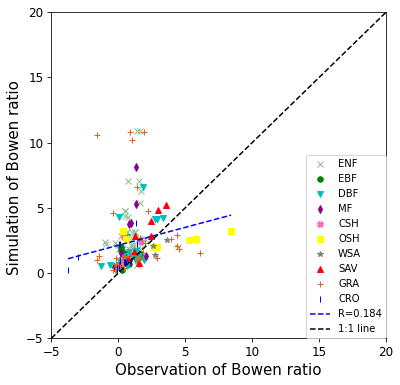

In [17]:
fig, axes = plt.subplots(figsize=(6,6)) 
plt.subplots_adjust(hspace=None)



s=['x','o','v','d','X','s','*','^','+','|']
IGBP=['ENF','EBF','DBF','MF','CSH','OSH','WSA','SAV','GRA','CRO']
color=['darkseagreen','g','c','darkmagenta','hotpink','yellow','gray','red','chocolate','blue']
for i in range(10):
    plt.plot(data[data['IGBP']==IGBP[i]].b,data[data['IGBP']==IGBP[i]].b_M, s[i],label=IGBP[i],color=color[i],markersize=5.5)


def plot_fitting(df, x_txt, y_txt,ax, order=1):
    parameter=np.polyfit(df[x_txt],df[y_txt],order)
    p = np.poly1d(parameter)
    y= parameter[0] * df[x_txt]  + parameter[1] 
    xp = np.linspace(df[x_txt].min(), df[x_txt].max(), 50)
    correlation = df[x_txt].corr(df[y_txt])  #相关系数
    correlation=round(correlation,3)
    c=str(correlation)
    axes.plot(xp, p(xp), '--',color='blue',lw=1.5,label="R="+c)
    
plot_fitting(data,'b','b_M',axes)

axes.plot((0,1),(0,1),transform=axes.transAxes,ls='--',c='k', label="1:1 line")
axes.tick_params(labelsize=12,length=4)

plt.legend(fontsize = 10,loc=4,borderaxespad = 0)
plt.xlim(-5,20)
plt.ylim(-5,20)
plt.xlabel("Observation of Bowen ratio",fontsize = 15)
plt.ylabel("Simulation of Bowen ratio ",fontsize = 15)
plt.savefig("folder/图/5.对比_b.jpg",dpi=300)

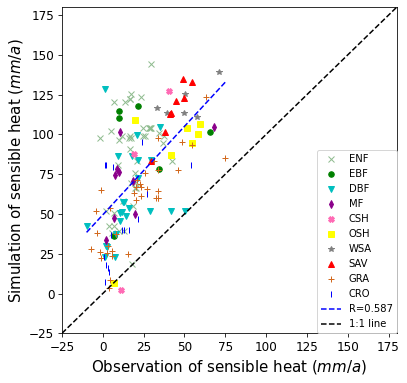

In [18]:
fig, axes = plt.subplots(figsize=(6,6)) 
plt.subplots_adjust(hspace=None)
#plt.axhline(0,linestyle='--', color='k',  linewidth=0.5)  



s=['x','o','v','d','X','s','*','^','+','|']
IGBP=['ENF','EBF','DBF','MF','CSH','OSH','WSA','SAV','GRA','CRO']
color=['darkseagreen','g','c','darkmagenta','hotpink','yellow','gray','red','chocolate','blue']
for i in range(10):
    axes.plot(data[data['IGBP']==IGBP[i]].H_F_MDS,data[data['IGBP']==IGBP[i]].H_M, s[i],label=IGBP[i],color=color[i],markersize=5.5)

def plot_fitting(df, x_txt, y_txt,ax, order=1):
    parameter=np.polyfit(df[x_txt],df[y_txt],order)
    p = np.poly1d(parameter)
    y= parameter[0] * df[x_txt]  + parameter[1] 
    xp = np.linspace(df[x_txt].min(), df[x_txt].max(), 50)
    correlation = df[x_txt].corr(df[y_txt])  #相关系数
    correlation=round(correlation,3)
    c=str(correlation)
    axes.plot(xp, p(xp), '--',color='blue',lw=1.5,label="R="+c)
    
plot_fitting(data,'H_F_MDS','H_M',axes)
axes.plot((0,1),(0,1),transform=axes.transAxes,ls='--',c='k', label="1:1 line")
axes.tick_params(labelsize=12,length=4)

plt.xlim(-25,180)
plt.ylim(-25,180)
plt.xlabel("Observation of sensible heat ($mm/a$)",fontsize = 15)
plt.ylabel("Simulation of sensible heat ($mm/a$)",fontsize = 15)
plt.legend(fontsize = 10,loc=4,borderaxespad = 0)
plt.savefig("folder/图/5.对比_H.jpg",dpi=300)

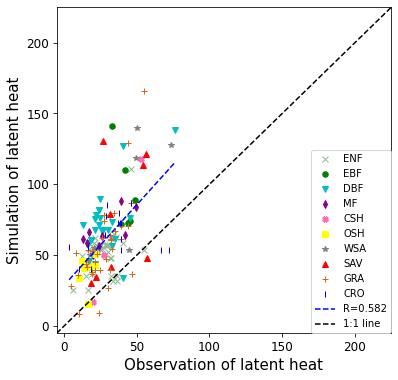

In [19]:
fig, axes = plt.subplots(figsize=(6,6)) 
plt.subplots_adjust(hspace=None)
#plt.axhline(0,linestyle='--', color='k',  linewidth=0.5)  



s=['x','o','v','d','X','s','*','^','+','|']
IGBP=['ENF','EBF','DBF','MF','CSH','OSH','WSA','SAV','GRA','CRO']
color=['darkseagreen','g','c','darkmagenta','hotpink','yellow','gray','red','chocolate','blue']
for i in range(10):
    axes.plot(data[data['IGBP']==IGBP[i]].LE_F_MDS,data[data['IGBP']==IGBP[i]].LE_M, s[i],label=IGBP[i],color=color[i],markersize=5.5)

def plot_fitting(df, x_txt, y_txt,ax, order=1):
    parameter=np.polyfit(df[x_txt],df[y_txt],order)
    p = np.poly1d(parameter)
    y= parameter[0] * df[x_txt]  + parameter[1] 
    xp = np.linspace(df[x_txt].min(), df[x_txt].max(), 50)
    correlation = df[x_txt].corr(df[y_txt])  #相关系数
    correlation=round(correlation,3)
    c=str(correlation)
    axes.plot(xp, p(xp), '--',color='blue',lw=1.5,label="R="+c)
    
plot_fitting(data,'LE_F_MDS','LE_M',axes)

axes.plot((0,1),(0,1),transform=axes.transAxes,ls='--',c='k', label="1:1 line")
axes.tick_params(labelsize=12,length=4)

plt.xlim(-5,225)
plt.ylim(-5,225)
plt.xlabel("Observation of latent heat",fontsize = 15)
plt.ylabel("Simulation of latent heat",fontsize = 15)
plt.legend(fontsize = 10,loc=4,borderaxespad = 0)
plt.savefig("folder/图/5.对比_LE.jpg",dpi=300)

In [20]:
compare=data.groupby('IGBP').mean()
compare_sem=data.groupby('IGBP').sem()

com=pd.DataFrame(columns=['1'])
com.insert(1,'H_M',compare.H_M)
com.insert(1,'LE_M',compare.LE_M)
com.insert(1,'b_M',compare.b_M)
com.insert(1,'H_F_MDS',compare.H_F_MDS)
com.insert(1,'LE_F_MDS',compare.LE_F_MDS)
com.insert(1,'b',compare.b)

com.insert(1,'H_M_sem',compare_sem.H_M)
com.insert(1,'LE_M_sem',compare_sem.LE_M)
com.insert(1,'b_M_sem',compare_sem.b_M)
com.insert(1,'H_F_MDS_sem',compare_sem.H_F_MDS)
com.insert(1,'LE_F_MDS_sem',compare_sem.LE_F_MDS)
com.insert(1,'b_sem',compare_sem.b)

In [21]:
com

,1,b_sem,LE_F_MDS_sem,H_F_MDS_sem,b_M_sem,LE_M_sem,H_M_sem,b,LE_F_MDS,H_F_MDS,b_M,LE_M,H_M
IGBP,,,,,,,,,,,,,
CRO,NaN,0.349388,4.515900,3.566656,0.240324,3.678016,7.196500,-0.038715,34.470884,12.060200,1.206497,64.238797,47.601012
CSH,NaN,0.421672,10.050477,8.759377,0.594125,29.670822,36.860993,0.838947,33.455083,23.488814,1.986065,61.849731,72.422646
DBF,NaN,0.234448,2.674176,2.827672,0.341697,4.637457,5.570900,1.046600,28.364381,15.744235,1.989316,72.231145,60.442189
EBF,NaN,0.226482,2.244424,9.241402,0.275200,11.284656,12.779463,0.575749,42.280355,24.709311,1.296286,93.039883,93.021459
ENF,NaN,0.131666,1.434493,1.511442,0.353718,2.145020,4.351433,0.896077,25.865408,18.175563,3.025106,51.922511,85.763155
GRA,NaN,0.296482,1.962312,3.331855,0.525999,4.840318,4.556341,1.182703,27.466428,21.016793,2.630946,56.154698,56.664967
MF,NaN,0.240935,4.342295,6.679147,0.862756,4.150588,7.955845,0.784071,27.525031,16.789426,2.885080,65.928821,70.833365
OSH,NaN,1.110272,1.565979,7.850305,0.193177,4.310109,13.668262,3.715542,16.089832,41.841626,2.584909,38.958614,86.999418
SAV,NaN,0.348324,5.660748,2.801190,0.588783,14.776713,6.029355,2.032252,37.423071,43.635305,2.913932,74.934267,115.327963


In [22]:
order=[10,5,3,2,1,9,4,6,8,7]
com.insert(1,'order',order)
com.sort_values(by='order',ascending=True, inplace=True) 

In [23]:
com

,1,order,b_sem,LE_F_MDS_sem,H_F_MDS_sem,b_M_sem,LE_M_sem,H_M_sem,b,LE_F_MDS,H_F_MDS,b_M,LE_M,H_M
IGBP,,,,,,,,,,,,,,
ENF,NaN,1,0.131666,1.434493,1.511442,0.353718,2.145020,4.351433,0.896077,25.865408,18.175563,3.025106,51.922511,85.763155
EBF,NaN,2,0.226482,2.244424,9.241402,0.275200,11.284656,12.779463,0.575749,42.280355,24.709311,1.296286,93.039883,93.021459
DBF,NaN,3,0.234448,2.674176,2.827672,0.341697,4.637457,5.570900,1.046600,28.364381,15.744235,1.989316,72.231145,60.442189
MF,NaN,4,0.240935,4.342295,6.679147,0.862756,4.150588,7.955845,0.784071,27.525031,16.789426,2.885080,65.928821,70.833365
CSH,NaN,5,0.421672,10.050477,8.759377,0.594125,29.670822,36.860993,0.838947,33.455083,23.488814,1.986065,61.849731,72.422646
OSH,NaN,6,1.110272,1.565979,7.850305,0.193177,4.310109,13.668262,3.715542,16.089832,41.841626,2.584909,38.958614,86.999418
WSA,NaN,7,0.446585,8.476681,5.579899,0.301454,17.141691,4.414420,2.095265,42.933741,50.225583,1.779944,91.021359,119.755968
SAV,NaN,8,0.348324,5.660748,2.801190,0.588783,14.776713,6.029355,2.032252,37.423071,43.635305,2.913932,74.934267,115.327963
GRA,NaN,9,0.296482,1.962312,3.331855,0.525999,4.840318,4.556341,1.182703,27.466428,21.016793,2.630946,56.154698,56.664967


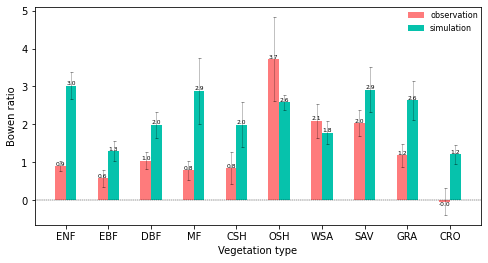

In [24]:
#绘图
fig, axes = plt.subplots(figsize=(8, 4))
width = 0.25
labels = ['ENF','EBF','DBF','MF','CSH','OSH','WSA','SAV','GRA','CRO']
plt.xlabel("Vegetation type")
plt.ylabel("Bowen ratio")


plt.axhline(0,linestyle='--', color='k',  linewidth=0.4)       

x =[1,2,3,4,5,6,7,8,9,10]
x = np.arange(len(x))


error_params=dict(elinewidth=0.6,ecolor='black',capsize=1.5,alpha=0.4)
axes.bar(x,com.b,width,label='observation',yerr=com.b_sem,error_kw=error_params,fc='#fe7b7c')
for a,b in zip(x,com.b):
    if b < 0:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'top',fontsize=6)
    else:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'bottom',fontsize=6)



axes.bar(x+0.25,com.b_M,width,label='simulation',yerr=com.b_M_sem,error_kw=error_params,fc='#06c2ac',edgecolor= 'black',lw=0)
for a,b in zip(x+0.25,com.b_M):
    if b < 0:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'top',fontsize=6)
    else:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'bottom',fontsize=6)


axes.set_xticks(x+width/2)
axes.set_xticklabels(['ENF','EBF','DBF','MF','CSH','OSH','WSA','SAV','GRA','CRO'], rotation=0)
plt.legend(fontsize = 8,loc=1,frameon=False,borderaxespad = 0)
plt.savefig("folder/图/6.对比_b.jpg",dpi=300)
plt.show()

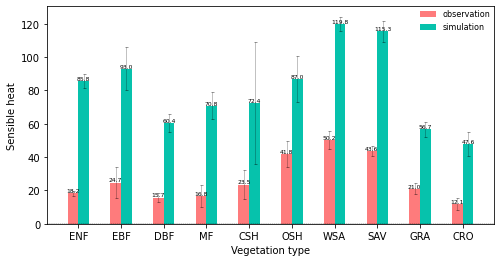

In [25]:
#绘图
fig, axes = plt.subplots(figsize=(8, 4))
width = 0.25
labels = ['ENF','EBF','DBF','MF','CSH','OSH','WSA','SAV','GRA','CRO']
plt.xlabel("Vegetation type")
plt.ylabel("Sensible heat")


plt.axhline(0,linestyle='--', color='k',  linewidth=0.4)       

x =[1,2,3,4,5,6,7,8,9,10]
x = np.arange(len(x))


error_params=dict(elinewidth=0.6,ecolor='black',capsize=1.5,alpha=0.4)
axes.bar(x,com.H_F_MDS,width,label='observation',yerr=com.H_F_MDS_sem,error_kw=error_params,fc='#fe7b7c')
for a,b in zip(x,com.H_F_MDS):
    if b < 0:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'top',fontsize=6)
    else:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'bottom',fontsize=6)



axes.bar(x+0.25,com.H_M,width,label='simulation',yerr=com.H_M_sem,error_kw=error_params,fc='#06c2ac',edgecolor= 'black',lw=0)
for a,b in zip(x+0.25,com.H_M):
    if b < 0:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'top',fontsize=6)
    else:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'bottom',fontsize=6)


axes.set_xticks(x+width/2)
axes.set_xticklabels(['ENF','EBF','DBF','MF','CSH','OSH','WSA','SAV','GRA','CRO'], rotation=0)
plt.legend(fontsize = 8,loc=1,frameon=False,borderaxespad = 0)
plt.savefig("folder/图/6.对比_H.jpg",dpi=300)
plt.show()

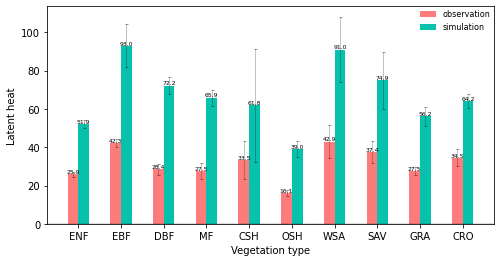

In [26]:
#绘图
fig, axes = plt.subplots(figsize=(8, 4))
width = 0.25
labels = ['ENF','EBF','DBF','MF','CSH','OSH','WSA','SAV','GRA','CRO']
plt.xlabel("Vegetation type")
plt.ylabel("Latent heat")


plt.axhline(0,linestyle='--', color='k',  linewidth=0.4)       

x =[1,2,3,4,5,6,7,8,9,10]
x = np.arange(len(x))


error_params=dict(elinewidth=0.6,ecolor='black',capsize=1.5,alpha=0.4)
axes.bar(x,com.LE_F_MDS,width,label='observation',yerr=com.LE_F_MDS_sem,error_kw=error_params,fc='#fe7b7c')
for a,b in zip(x,com.LE_F_MDS):
    if b < 0:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'top',fontsize=6)
    else:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'bottom',fontsize=6)



axes.bar(x+0.25,com.LE_M,width,label='simulation',yerr=com.LE_M_sem,error_kw=error_params,fc='#06c2ac',edgecolor= 'black',lw=0)
for a,b in zip(x+0.25,com.LE_M):
    if b < 0:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'top',fontsize=6)
    else:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'bottom',fontsize=6)


axes.set_xticks(x+width/2)
axes.set_xticklabels(['ENF','EBF','DBF','MF','CSH','OSH','WSA','SAV','GRA','CRO'], rotation=0)
plt.legend(fontsize = 8,loc=1,frameon=False,borderaxespad = 0)
plt.savefig("folder/图/6.对比_LE.jpg",dpi=300)
plt.show()

In [28]:
com.b_M.mean()-com.b.mean()

0.9169588712472629

In [30]:
com.H_M.mean()-com.H_F_MDS.mean()

54.1145286157752

In [31]:
com.LE_M.mean()-com.LE_F_MDS.mean()

35.440561234467644